# Logistic Regression

In [1]:
## References:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# https://www.codementor.io/@mgalarny/making-your-first-machine-learning-classifier-in-scikit-learn-python-db7d7iqdh

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets  import load_digits

### Load MNIST data set


In [3]:
mnist = load_digits()

### Flattening and Normalize the data

In [4]:
# this code is adopted from the example from Yulia Newton

n_samples = len(mnist.images)
X = mnist.images.reshape((n_samples, -1))
X = X.astype("float32") / 255
labels_digit = mnist.target

### Load images

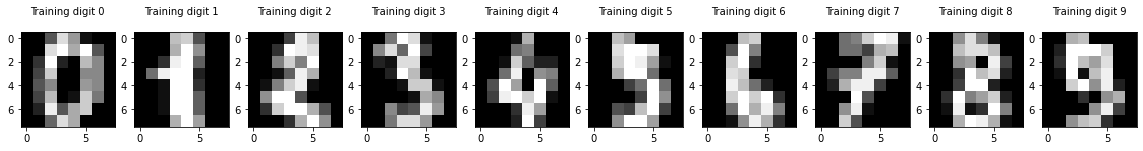

In [5]:
# this code is adopted from this example:
# https://www.codementor.io/@mgalarny/making-your-first-machine-learning-classifier-in-scikit-learn-python-db7d7iqdh

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:10], labels_digit[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training digit %i\n' % label, fontsize = 10)

###  A non-normalized confusion matrix for each digit

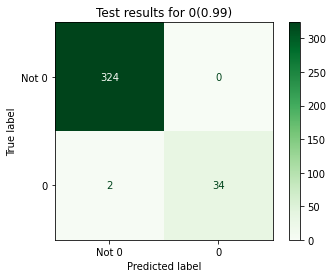

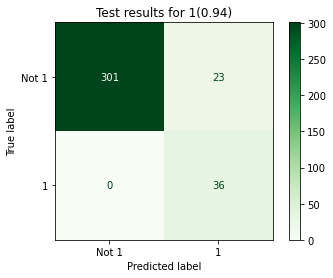

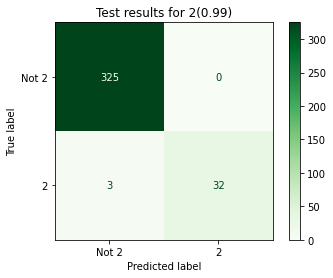

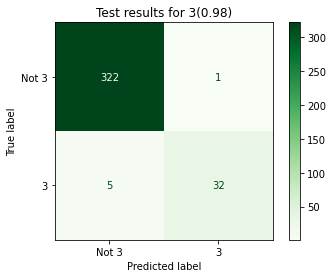

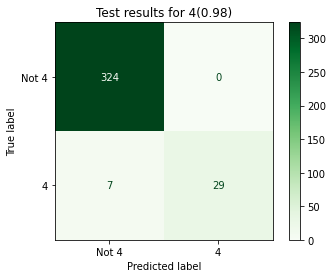

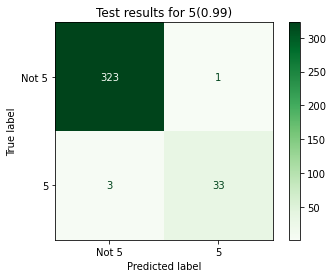

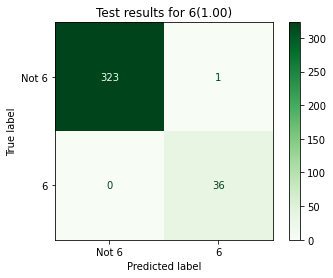

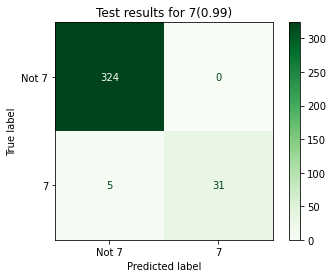

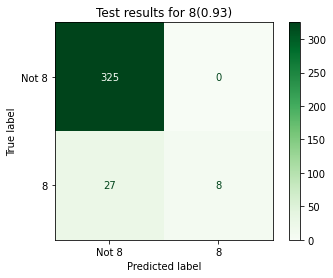

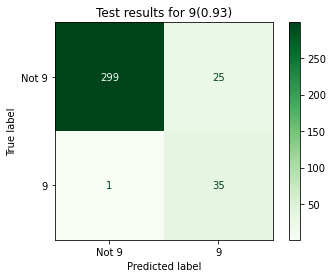

In [7]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

model_mnist = Perceptron(tol=1e-3, random_state=0)
for num in range(10):
    Y = (labels_digit == num).astype("int")
    #Split data 80/20
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)
    X_train.shape, Y_train.shape, X_test.shape, Y_test.shape
    model_mnist.fit(X_train, Y_train)
    accuracy_train_set = float(model_mnist.score(X_train, Y_train)) #Compute accuracy of the model on train data (Not display)
    accuracy_test_set = float(model_mnist.score(X_test, Y_test)) #Compute accuracy of the model on test data
    np.set_printoptions(precision=2)
    titles_options = [("Test results for " + str(num) + "(" +'{0:.2f}'.format(accuracy_test_set) + ")"  , None)]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model_mnist, X_test, Y_test,
                                 display_labels=['Not ' +  str(num),str(num)],
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
        disp.ax_.set_title(title)

    plt.show()